# CNN U-NET: Skull-Stripping em Imagens 2D

From: https://github.com/jocicmarko/ultrasound-nerve-segmentation

Exemplo de Skull-Stripping (Segmentação do cérebro) em imagens 2D de ressonância magnética utilizando a implementação da CNN U-NET do link acima. Os resultados iniciais desta implementação foram submetidos ao evento BRAINN 2017.

Neste exemplo utilizou-se as imagens do dataset CC-349.250 imagens foram utilizadas para treino e como efeito ilustrativo, o teste foi realizado em 4 imagens as quais são apresentadas no fim do notebook.

**Faz se necessário criar as seguintes pastas dentro do diretório do notebook**:

```
src/
    treino_mid_samples/ (imagens do treino em 2D da fatia central sagital)  
    treino_patches/ (patches para o treino)
    teste_mid_samples/ (imagens do test em 2D da fatia central sagital)
    teste_patches/ (patches para o teste)
    test_prep_data/ (dados de teste pré-processados para predição) 
    pred_data/ (resultados das predições da CNN)
    pred_image/ (imagens reconstruídas a partir das predições da CNN)

```
            
CC-349 dataset: http://miclab.fee.unicamp.br/calgary-campinas-359 

Artigo U-NET: https://arxiv.org/pdf/1505.04597.pdf

Arquitetura da U-NET:
![](http://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)


# Módulos a serem utilizados

In [1]:
%matplotlib inline
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # Para Reprodutibilidade
import os
os.environ['THEANO_FLAGS'] = "device=gpu0,floatX=float32"    
import theano

Using gpu device 0: Tesla K40c (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 2000.)


In [2]:
# Keras
from keras.models import Model
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K


Using Theano backend.


In [3]:
import glob
import os,time
import cv2
import matplotlib.pylab as plt
from preprop_utils import create_data, get_mid_sample, save_2d_slices, save_2d_samples
from preprop_utils import sample_2d_patches, preprocess, get_mean_std_train, read_prep_test
from preprop_utils import load_train_data, reconstruct_2d_sample, save_data, save_test_images

As informações presentes nessa célula também estão no arquivo prepro_utils.py

In [6]:
# Diretório do notebook
out = '/home/adessowiki/Development/Oeslle/rnpi-notebooks'

# Configurações da u-net
img_rows = 64
img_cols = 80
smooth = 1.

# Pré-processamento

## Dados de Treino

In [19]:
if __name__ == '__main__':

    start_time = time.time()
 
    # Treino
    print('-'*30)
    print('Creating Train 2D Patches...')
    print('-'*30)
    sample_2d_patches('train_patches','train')
    
    print('-'*30)
    print('Creating Train Data...')
    print('-'*30)  
    imgs, imgs_mask = create_data('train_patches')
    save_data(imgs, imgs_mask, 'imgs_train.npy', 'imgs_mask_train.npy')
    
    print("--- %s seconds ---" % (time.time() - start_time))

------------------------------
Creating Train 2D Patches...
------------------------------
Sampling Train Images ...
Saving image: CVCD01120001
Saving image: CVCD01120003
Saving image: CVCD01120013
Saving image: CVCD01120016
Saving image: CVCD01120018
Saving image: CVCD01120021
Saving image: CVCD01120030
Saving image: CVCD01120034
Saving image: CVCD01120038
Saving image: CVCD01120041
Saving image: CVCD01120043
Saving image: CVCD01120044
Saving image: CVCD01120047
Saving image: CVCD01120054
Saving image: CVCD01120055
Saving image: CVCD01120065
Saving image: CVCD01120067
Saving image: CVCD01120069
Saving image: CVCD01120070
Saving image: CVCD01120074
Saving image: CVCD01120077
Saving image: CVCD01120078
Saving image: CVCD01120079
Saving image: CVCD01120080
Saving image: CVCD01120082
Saving image: CVCD01120099
Saving image: CVCD01120101
Saving image: CVCD01120102
Saving image: CVCD01120105
Saving image: CVCD01120108
Saving image: CVCD01120123
Saving image: CVCD01120124
Saving image: CVCD0

## Dados de Teste

In [23]:
if __name__ == '__main__':

    start_time = time.time()

    # Teste 
    print('-'*30)
    print('Saving Tests 2D Slices...')
    print('-'*30)
    out_path = os.path.join(out,'test_mid_samples')
    save_test_images(out_path)

    print('-'*30)
    print('Creating Test 2D Patches...')
    print('-'*30)
    sample_2d_patches('test_patches','test')

    print('-'*30)
    print('Creating Preprocessed Test Data...')
    print('-'*30)
    test_patches_folds = np.sort(glob.glob('test_patches/*'))
    mean, std = get_mean_std_train('imgs_train.npy', 'imgs_mask_train.npy')
       
    for fold in test_patches_folds:
        name = fold.split('/')[-1]
        print ("Image:", name)
        print ('\n')
        imgs, imgs_mask = create_data(fold)
        imgs_test = read_prep_test(imgs,mean,std)
        np.savez_compressed(os.path.join(out,'test_prep_data/' + name +'-prep.npz'),
                            imgs_test = imgs_test)
        
    print("--- %s seconds ---" % (time.time() - start_time))
    

------------------------------
Creating Preprocessed Test Data...
------------------------------
Image: CVCD22990018


Done: 0/34161 images
Done: 100/34161 images
Done: 200/34161 images
Done: 300/34161 images
Done: 400/34161 images
Done: 500/34161 images
Done: 600/34161 images
Done: 700/34161 images
Done: 800/34161 images
Done: 900/34161 images
Done: 1000/34161 images
Done: 1100/34161 images
Done: 1200/34161 images
Done: 1300/34161 images
Done: 1400/34161 images
Done: 1500/34161 images
Done: 1600/34161 images
Done: 1700/34161 images
Done: 1800/34161 images
Done: 1900/34161 images
Done: 2000/34161 images
Done: 2100/34161 images
Done: 2200/34161 images
Done: 2300/34161 images
Done: 2400/34161 images
Done: 2500/34161 images
Done: 2600/34161 images
Done: 2700/34161 images
Done: 2800/34161 images
Done: 2900/34161 images
Done: 3000/34161 images
Done: 3100/34161 images
Done: 3200/34161 images
Done: 3300/34161 images
Done: 3400/34161 images
Done: 3500/34161 images
Done: 3600/34161 images
Done:

# Treinamento da CNN

In [4]:
def dice_coef(y_true, y_pred):
    
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    
    return -dice_coef(y_true, y_pred)


def get_unet():
    
    inputs = Input((1, img_rows, img_cols))
    conv1 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(inputs)
    conv1 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(pool1)
    conv2 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(pool2)
    conv3 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Convolution2D(256, 3, 3, activation='relu', border_mode='same')(pool3)
    conv4 = Convolution2D(256, 3, 3, activation='relu', border_mode='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Convolution2D(512, 3, 3, activation='relu', border_mode='same')(pool4)
    conv5 = Convolution2D(512, 3, 3, activation='relu', border_mode='same')(conv5)

    up6 = merge([UpSampling2D(size=(2, 2))(conv5), conv4], mode='concat', concat_axis=1)
    conv6 = Convolution2D(256, 3, 3, activation='relu', border_mode='same')(up6)
    conv6 = Convolution2D(256, 3, 3, activation='relu', border_mode='same')(conv6)

    up7 = merge([UpSampling2D(size=(2, 2))(conv6), conv3], mode='concat', concat_axis=1)
    conv7 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(up7)
    conv7 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(conv7)

    up8 = merge([UpSampling2D(size=(2, 2))(conv7), conv2], mode='concat', concat_axis=1)
    conv8 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(up8)
    conv8 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv8)

    up9 = merge([UpSampling2D(size=(2, 2))(conv8), conv1], mode='concat', concat_axis=1)
    conv9 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(up9)
    conv9 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv9)

    conv10 = Convolution2D(1, 1, 1, activation='sigmoid')(conv9)

    model = Model(input=inputs, output=conv10)
    model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss, metrics=[dice_coef])

    return model

def run_train():
    
    print('-'*30)
    print('Load, and preprop. train data...')
    print('-'*30)
    imgs_train, imgs_mask_train = load_train_data('imgs_train.npy', 'imgs_mask_train.npy')

    imgs_train = preprocess(imgs_train)
    imgs_mask_train = preprocess(imgs_mask_train)

    imgs_train = imgs_train.astype('float32')
    mean = np.mean(imgs_train)  # mean for data centering
    std = np.std(imgs_train)  # std for data normalization

    imgs_train -= mean
    imgs_train /= std

    imgs_mask_train = imgs_mask_train.astype('float32')
    imgs_mask_train /= 255.  # scale masks to [0, 1]

    print('-'*30)
    print('Creating and compiling model...')
    print('-'*30)
    model = get_unet()
    model_checkpoint = ModelCheckpoint('unet.hdf5', monitor='loss', save_best_only=True)

    print('-'*30)
    print('Fitting model...')
    print('-'*30)
    model.fit(imgs_train, imgs_mask_train, batch_size=50, nb_epoch=30, verbose=1,
              shuffle=True,callbacks=[model_checkpoint])

In [7]:
if __name__ == '__main__':
    run_train()

------------------------------
Load, and preprop. train data...
------------------------------
------------------------------
Creating and compiling model...
------------------------------
------------------------------
Fitting model...
------------------------------
Epoch 1/30
25000/25000 [==============================] - 435s - loss: -0.6566 - dice_coef: 0.6566   
Epoch 2/30
25000/25000 [==============================] - 435s - loss: -0.8659 - dice_coef: 0.8659   
Epoch 3/30
25000/25000 [==============================] - 434s - loss: -0.9021 - dice_coef: 0.9021   
Epoch 4/30
25000/25000 [==============================] - 435s - loss: -0.9195 - dice_coef: 0.9195   
Epoch 5/30
25000/25000 [==============================] - 434s - loss: -0.9328 - dice_coef: 0.9328   
Epoch 6/30
25000/25000 [==============================] - 435s - loss: -0.9401 - dice_coef: 0.9401   
Epoch 7/30
25000/25000 [==============================] - 434s - loss: -0.9454 - dice_coef: 0.9454   
Epoch 8/30
25000/2

# Teste nas Images

In [7]:
def run_predict(path, name):

    print('-'*30)
    print('Loading saved weights...')
    print('-'*30)

    model = get_unet()
    model.load_weights('unet.hdf5')

    print('-'*30)
    print('Load. and prepro. test data...')
    print('-'*30)
       
    print('-'*30)
    print('Predicting masks on test data...')
    print('-'*30)
    
    with np.load(path) as data:
        imgs_test = data['imgs_test']
    
    np.save(os.path.join('pred_data', name +'-pred.npy'), model.predict(imgs_test, verbose=1))

In [24]:
if __name__ == '__main__':
    
    start_time = time.time()

    test_imgs_names = np.sort(glob.glob('test_prep_data/*'))
    for img in test_imgs_names:
        name = img.split('/')[-1].split('-')[0]
        print ("Image:", name)
        run_predict(img,name)

    #run_predict("CVCD10010001-prep.npz","CVCD10010001")

    print('-'*30)
    print('Reconstructing test predictions...')
    print('-'*30)
    pred_data =  np.asarray(glob.glob('pred_data/*'))
    for data in pred_data:
        reconstruct_2d_sample('pred_image', data, 'test_mid_samples')
    
    print("--- %s seconds ---" % (time.time() - start_time))

Image: CVCD22990018
------------------------------
Loading saved weights...
------------------------------
------------------------------
Load. and prepro. test data...
------------------------------
------------------------------
Predicting masks on test data...
------------------------------
34161/34161 [==============================] - 206s   
Image: CVCD22990023
------------------------------
Loading saved weights...
------------------------------
------------------------------
Load. and prepro. test data...
------------------------------
------------------------------
Predicting masks on test data...
------------------------------
34161/34161 [==============================] - 206s   
Image: CVCD22990036
------------------------------
Loading saved weights...
------------------------------
------------------------------
Load. and prepro. test data...
------------------------------
------------------------------
Predicting masks on test data...
------------------------------
34161

# Resultados

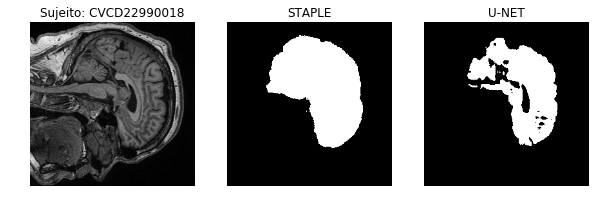

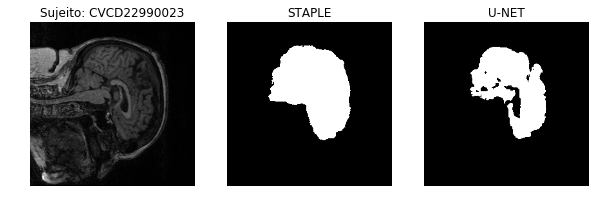

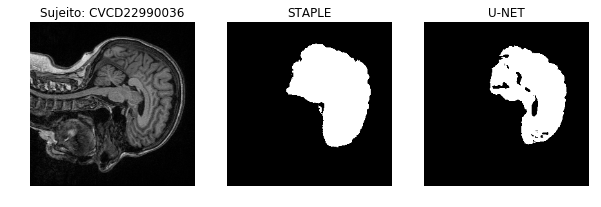

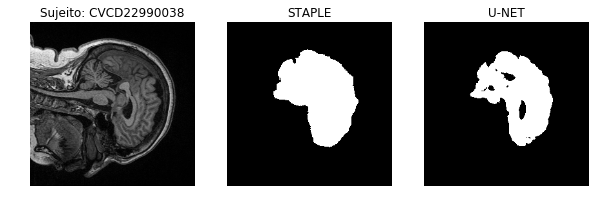

In [61]:
def plot_examples(test_image, mask_image, pred_image, name):
    
    plt.figure(figsize=(10, 15))
    plt.subplot(131)
    plt.imshow(test_image,cmap='gray')
    plt.title('Sujeito: ' + name)
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(mask_image,cmap='gray')
    plt.title('STAPLE')
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(pred_image,cmap='gray')
    plt.title('U-NET')
    plt.axis('off')
    plt.show

if __name__ == '__main__':
    
    pred_imgs_names = np.sort(glob.glob('pred_image/*'))

    for img_name in pred_imgs_names:
        
        name = img_name.split('/')[-1].split('-')[0]
        test_image = cv2.imread(os.path.join(out,'test_mid_samples/' + name +'.tif')
                                , cv2.IMREAD_GRAYSCALE)
        mask_image = cv2.imread(os.path.join(out,'test_mid_samples/' + name +'_staple.tif')
                                , cv2.IMREAD_GRAYSCALE)
        pred_image = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
        plot_examples(test_image, mask_image, pred_image, name)